# Federalist Papers Authorship Attribution – Combined 1-gram and 2-gram
This notebook applies the same classification and clustering techniques to **both** the 1-gram and 2-gram datasets.
It reuses identical logic and structure to maintain consistency in analysis and comparison.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define filenames and dataset labels
datasets = [
    ('1-gram', 'lexos_1gram_inALL_prop.csv'),
    ('2-gram', 'lexos_2gram_prop.csv')
]

# Authorship Attribution and the Federalist Papers 
### 📝 Author: [GABRIEL ALBERNAZ '26, Gemini, GitHub Copilot] | 📅 Date: [April 2025] (full project log in README.txt)

#### 📌 Description:
This project replicates and extends the authorship attribution analysis of the Federalist Papers conducted by Jockers and Witten (2010). Using machine learning techniques, including clustering and classification algorithms, the study aims to confirm the authorship of known papers and generate evidence to predict the authorship of the disputed and co-authored papers.(Gemini - 04/03)
<p></p>


## **Introduction**

Authorship attribution is the process of determining the author of a given text based on its linguistic and stylistic features. By analyzing patterns such as word usage, sentence structure, and vocabulary, computational methods can identify the most likely author of a document.

The Federalist Papers, a collection of 85 essays written in the late 18th century to promote the ratification of the United States Constitution, were authored by Alexander Hamilton, James Madison, and John Jay. While the authorship of most papers is well-established, there are 12 disputed papers and several co-authored ones, which have been the subject of extensive scholarly debate.

In this notebook, we will:
- Import and preprocess datasets containing {n}-gram and 2-gram word frequencies from the Federalist Papers.
- Explore and clean the data by removing unnecessary rows, renaming columns, and checking for null values or duplicates.
- Visualize data distributions and patterns using bar plots, heatmaps, and line plots.
- Perform clustering analysis, including K-means and hierarchical clustering, to group papers based on stylistic similarities.
- Apply dimensionality reduction techniques like PCA to handle high-dimensional data and improve clustering efficiency.
- Train and evaluate classification models (e.g., Decision Trees, SVM, Naive Bayes) to predict authorship of disputed papers.
- Use cross-validation to assess model performance and ensure robustness.
- Predict authorship of disputed and co-authored papers using trained models.
- Document findings and insights from clustering and classification analyses.


## **Imports**

In [2]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, accuracy_score
    from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.cluster import KMeans
    from scipy.cluster.hierarchy import linkage, dendrogram
    from sklearn.decomposition import PCA
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.tree import export_text, plot_tree
    from sklearn import svm
    
    



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


## **Reading the Data**

The initial file has proportional counts of “single” ({n}-gram) words that appear in all of the 85 texts. 
The second file has the proportional counts of “word pairs” (bigrams or 2-grams). This second file 
may contain some bi-grams that do not always appear in each text, that is, some zeros may appear 
if an author did not use that bi-gram in a specific text. Rows are for each text and the columns 
indicate the word usage proportions for each “token” used in that text.

The analysis utilizes pre-processed {n}-gram and bi-gram proportional counts of words from the Federalist Papers to identify stylistic patterns indicative of individual authors. These files were produced with the Lexos web app (Kleinman et al., 2019). For each file, scrubbing settings were: whitespace (newlines, tabs, runs of spaces) denote “word” boundaries; convert everything to lowercase; remove digits; remove any punctuation except keep apostrophes (e.g., “we’d” is kept as one token); hyphens were removed; no stop words were removed. 

In [3]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    filename = "filename"
    filename = "lexos_2gram_prop.csv"
    
    # Load the CSV files into Pandas DataFrames
    df_1gram = pd.read_csv(filename)
    df_2gram = pd.read_csv(filename)



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Let's look at the {n}-gram dataframe

In [4]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # First look at the 1-gram dataframe
    df_1gram



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


And now the 2-gram data

In [5]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    df_2gram



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


In [6]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Inspect the data
    print("1-Gram DataFrame:")
    print(df_1gram.info())
    
    print("\n2-Gram DataFrame:")
    print(df_2gram.info())



### Running for 1-gram dataset ###
1-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 70824 entries, Unnamed: 0 to zealous they
dtypes: float64(70823), object(1)
memory usage: 47.0+ MB
None

2-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 70824 entries, Unnamed: 0 to zealous they
dtypes: float64(70823), object(1)
memory usage: 47.0+ MB
None


### Running for 2-gram dataset ###
1-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 70824 entries, Unnamed: 0 to zealous they
dtypes: float64(70823), object(1)
memory usage: 47.0+ MB
None

2-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 70824 entries, Unnamed: 0 to zealous they
dtypes: float64(70823), object(1)
memory usage: 47.0+ MB
None


Taking a peek at our datasets, we can see that each row in the {n}-gram dataset represents a Federalist Paper, with columns indicating the proportional counts of individual words ({n}-grams) used in the text. The features are the unique words, and their values represent the frequency of occurrence normalized by the total word count in the document.

In the 2-gram dataset, each row also corresponds to a Federalist Paper, but the columns represent the proportional counts of word pairs (2-grams). These features capture the co-occurrence patterns of words, providing additional context about the writing style (GitHub Copilot, powered by OpenAI's GPT-4 model)

We can also determine that for our practices, we will not need the "Total" and "Average" rows, so we will go ahead and remove them 

Now remove "Total" and "Average"

In [7]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    df_1gram = df_1gram[~df_1gram['Unnamed: 0'].str.contains('Total|Average', na=False)]
    df_2gram = df_2gram[~df_2gram['Unnamed: 0'].str.contains('Total|Average', na=False)]



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Let's now rename the first column to "Paper_ID", and add a "Author" column

In [8]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    df_1gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
    df_1gram["Author"] = df_1gram["Paper_ID"].str.extract(r'_(\w)$')
    df_1gram.insert(1, "Author", df_1gram.pop("Author"))
    
    df_2gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
    df_2gram["Author"] = df_2gram["Paper_ID"].str.extract(r'_(\w)$')
    df_2gram.insert(1, "Author", df_2gram.pop("Author"))



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


#### **Shape of the Data**

Let's take a look at the dimensions of both dataframes

In [9]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Retrieve and print the shape of the dataframes
    shape = df_1gram.shape
    print(shape)
    shape = df_2gram.shape
    print(shape)



### Running for 1-gram dataset ###
(85, 70825)
(85, 70825)


### Running for 2-gram dataset ###
(85, 70825)
(85, 70825)


Check out the data types

In [10]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    df_1gram.dtypes
    df_2gram.dtypes



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Now let's see how many papers belong to each author, are co-authored, or disputed



### Running for 1-gram dataset ###
Hamilton Papers: 51
Madison Papers: 14
Jay Papers: 5
Co-authored Papers: 3
Disputed Papers: 12


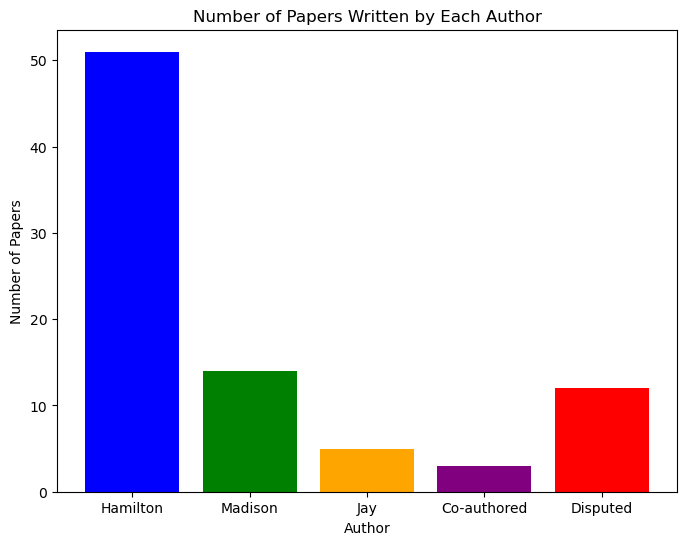



### Running for 2-gram dataset ###
Hamilton Papers: 51
Madison Papers: 14
Jay Papers: 5
Co-authored Papers: 3
Disputed Papers: 12


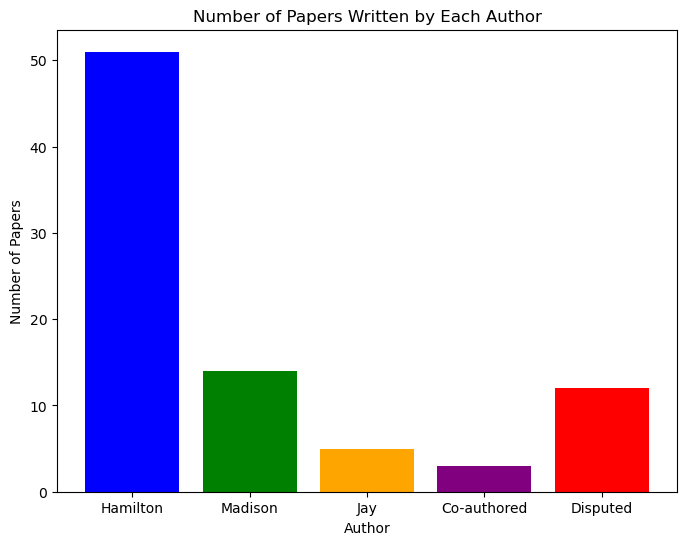

In [11]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Count papers by each author, co-authored, and disputed
    hamilton_count = (df_1gram['Author'] == 'H').sum()
    madison_count = (df_1gram['Author'] == 'M').sum()
    jay_count = (df_1gram['Author'] == 'J').sum()
    coauthored_count = (df_1gram['Author'] == 'C').sum()
    disputed_count = (df_1gram['Author'] == 'D').sum()
    
    # Print the counts
    print(f"Hamilton Papers: {hamilton_count}")
    print(f"Madison Papers: {madison_count}")
    print(f"Jay Papers: {jay_count}")
    print(f"Co-authored Papers: {coauthored_count}")
    print(f"Disputed Papers: {disputed_count}")
    
    # Data for the number of papers written by each author
    authors = ['Hamilton', 'Madison', 'Jay', 'Co-authored', 'Disputed']
    counts = [hamilton_count, madison_count, jay_count, coauthored_count, disputed_count]
    
    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(authors, counts, color=['blue', 'green', 'orange', 'purple', 'red'])
    plt.title('Number of Papers Written by Each Author')
    plt.xlabel('Author')
    plt.ylabel('Number of Papers')
    plt.show()

## **Data Exploration and Refinement**
The provided datasets require thorough exploration to understand their structure, identify potential issues, and ensure they are suitable for analysis. Key steps include:

- **Exploration**: Examine the datasets for dimensions, data types, and summary statistics to gain insights into their content and distribution.
- **Checking**: Identify and address missing values, duplicate rows, and outliers that could impact the analysis.
- **Refinement**: Transform and preprocess the data as needed, including normalization, feature selection, and handling of zero or near-zero variance features.


### **Cleaning Data**

##### Checking for null data

In [12]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # df_1gram.isnull()
    # df_2gram.isnull()
    print(df_1gram.isnull().sum())



### Running for 1-gram dataset ###
Paper_ID         0
Author           0
of the           0
to the           0
in the           0
                ..
for obtaining    0
for offenses     0
for on           0
for one          0
zealous they     0
Length: 70825, dtype: int64


### Running for 2-gram dataset ###
Paper_ID         0
Author           0
of the           0
to the           0
in the           0
                ..
for obtaining    0
for offenses     0
for on           0
for one          0
zealous they     0
Length: 70825, dtype: int64


##### Checking for duplicates

In [13]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    duplicate_rows = df_1gram.duplicated()
    print(f"Number of duplicate rows: {duplicate_rows.sum()}")



### Running for 1-gram dataset ###
Number of duplicate rows: 0


### Running for 2-gram dataset ###
Number of duplicate rows: 0


#### End of Data cleaning

No duplicate rows or null data points were found! Let's keep moving

### **Visualizing the Data**



### Running for 1-gram dataset ###


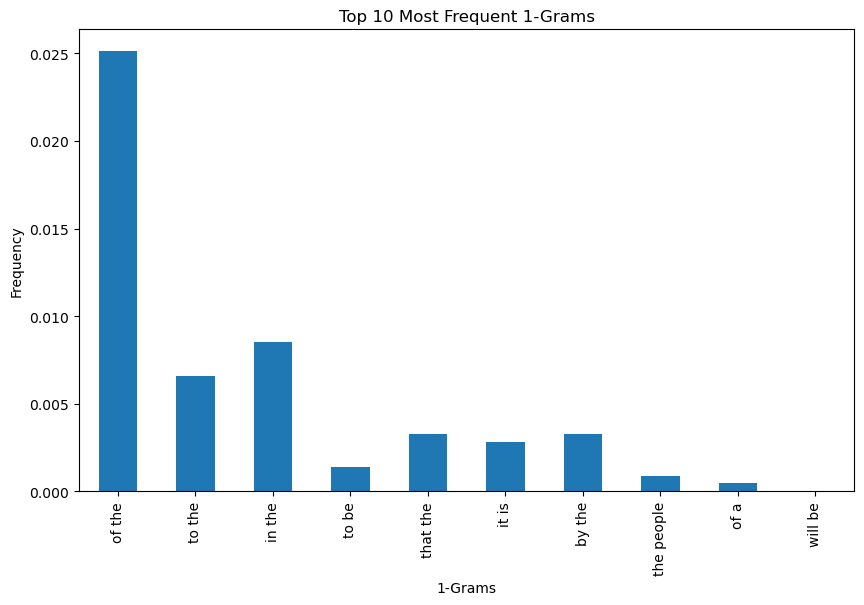

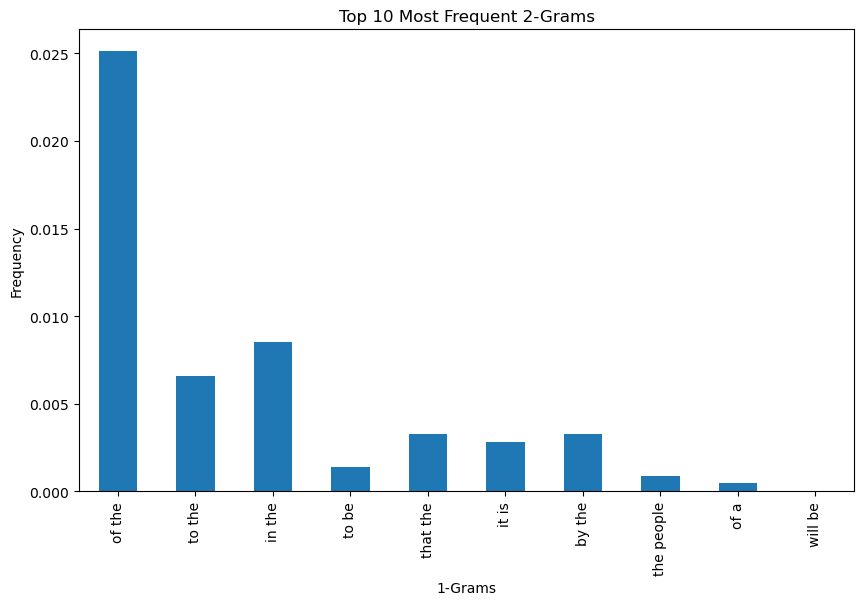

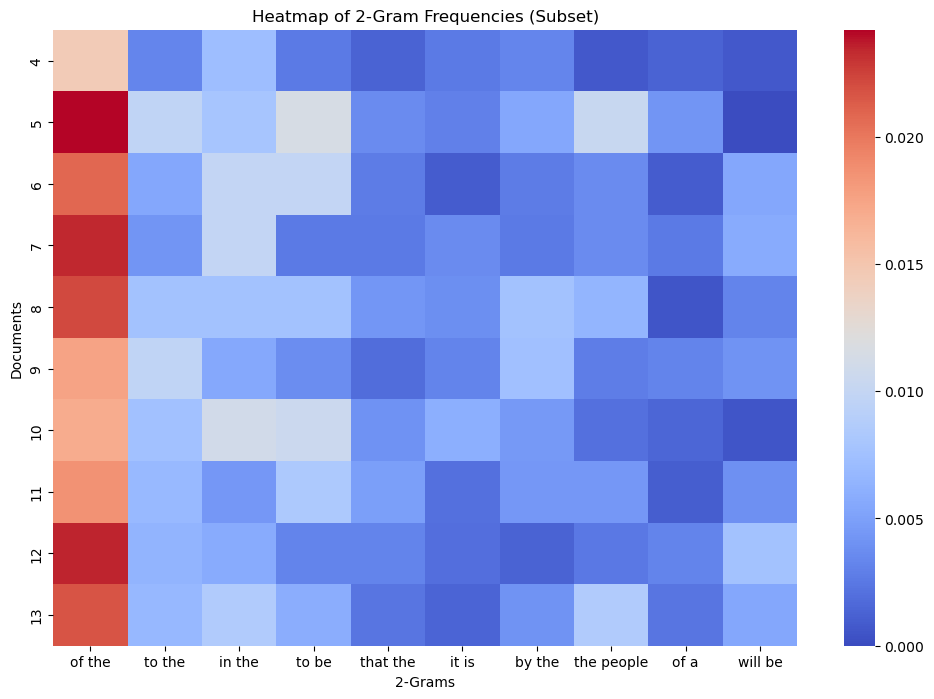

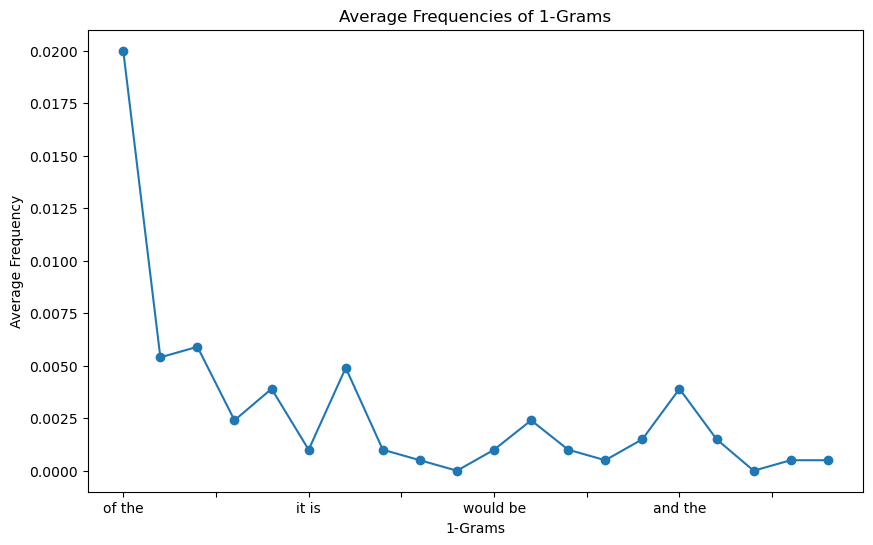



### Running for 2-gram dataset ###


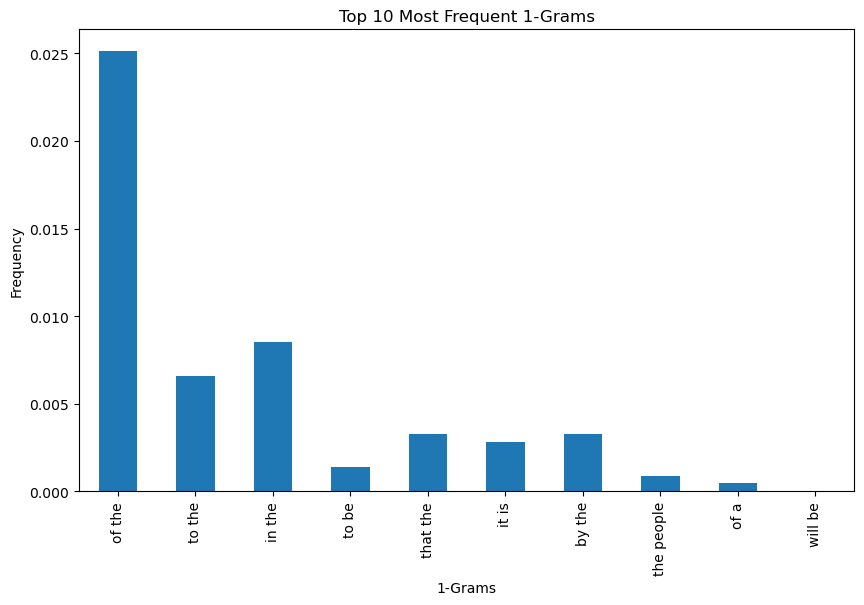

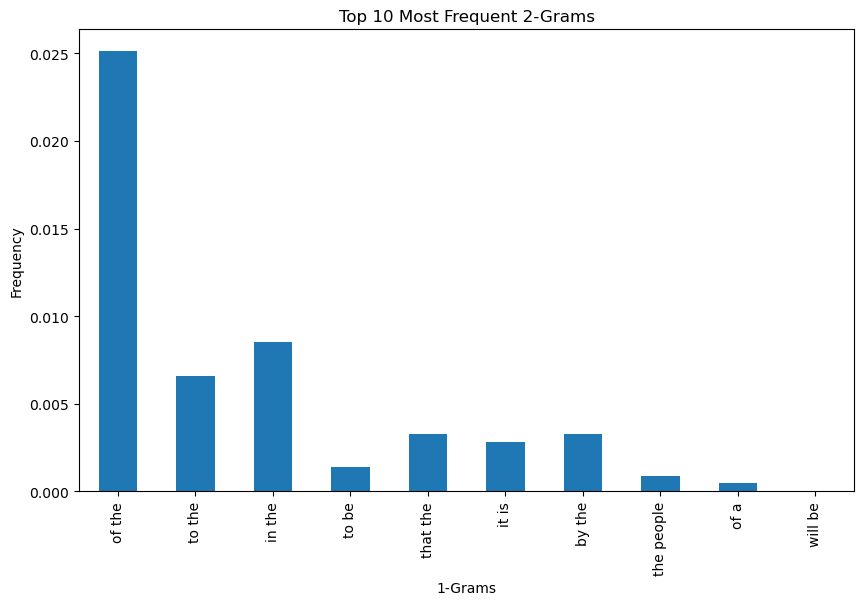

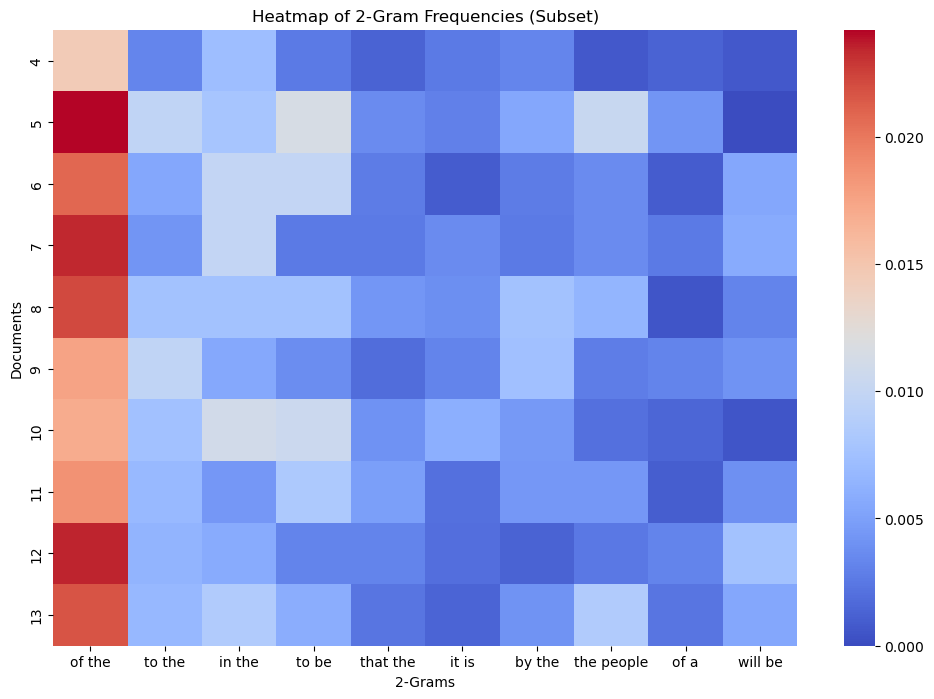

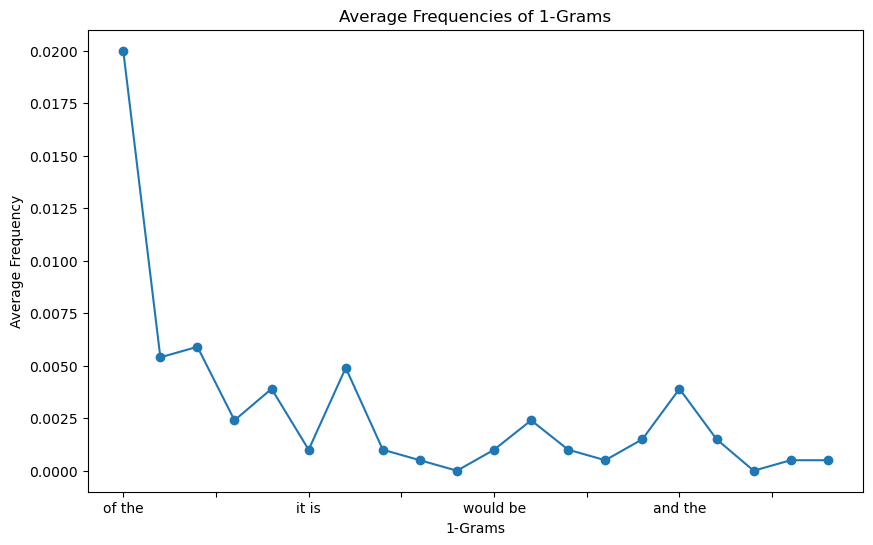

In [14]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Visualize the data using three different graphs
    
    # 1. Bar plot for the top 10 most frequent 1-grams
    top_10_1gram = df_1gram.iloc[0, 2:12]  
    top_10_1gram.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 1-Grams')
    plt.xlabel('1-Grams')
    plt.ylabel('Frequency')
    plt.show()
    
    top_10_2gram = df_2gram.iloc[0, 2:12]  
    top_10_2gram.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 2-Grams')
    plt.xlabel('1-Grams')
    plt.ylabel('Frequency')
    plt.show()
    
    # 2. Heatmap for a subset of the 2-gram data
    subset_2gram = df_2gram.iloc[2:12, 2:12]  # Selecting a subset of rows and columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(subset_2gram, annot=False, cmap='coolwarm')
    plt.title('Heatmap of 2-Gram Frequencies (Subset)')
    plt.xlabel('2-Grams')
    plt.ylabel('Documents')
    plt.show()
    
    # 3. Line plot for the average frequencies of 1-grams
    average_1gram = df_1gram.iloc[1, 2:22]  # Assuming the second row contains average frequencies
    average_1gram.plot(kind='line', figsize=(10, 6), marker='o', title='Average Frequencies of 1-Grams')
    plt.xlabel('1-Grams')
    plt.ylabel('Average Frequency')
    plt.show()

## **Cluster Analysis**

### Clustering known author's papers

For general pattern seeking to group points based on similarity, to deal with the high dimensionality of the data, and for a 2D visualization of our data, we will perform first a K-means clustering. More on the topic [here](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

We will create a new dataframe containing only the papers whose author's are known in order to maintain the original data unchanged, avoid unintended side effects, and facilitate experimentation. Contested and coauthored papers will be used for classification

In [15]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # copy of the original dataframe to be worked on, only containing papers written by either Hamilton, Madison, or Jay
    all_papers_known_authors = df_1gram[df_1gram['Author'].isin(['H', 'M', 'J'])]
    
    all_papers_known_authors



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


And now all the co-authored and disputed papers

In [16]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    all_papers_unknown_authors = df_1gram[df_1gram['Author'].isin(['C', 'D'])]
    all_papers_unknown_authors



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Principal Component Analysis (PCA) is necessary at this step to reduce the high dimensionality of the dataset, which contains thousands of features. By projecting the data onto a lower-dimensional space, PCA helps to capture the most significant patterns and variations in the data while discarding noise and redundant information. This dimensionality reduction is crucial for visualizing the data in two dimensions and for improving the efficiency and interpretability of subsequent clustering and classification tasks. More on the topic [here](https://www.geeksforgeeks.org/principal-component-analysis-pca/)

In [17]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Performing PCA
    pca = PCA(n_components=2)
    X_numeric = all_papers_known_authors.select_dtypes(include=[np.number])
    X_pca = pca.fit_transform(X_numeric)



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Now we can do K-means clustering



### Running for 1-gram dataset ###


c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


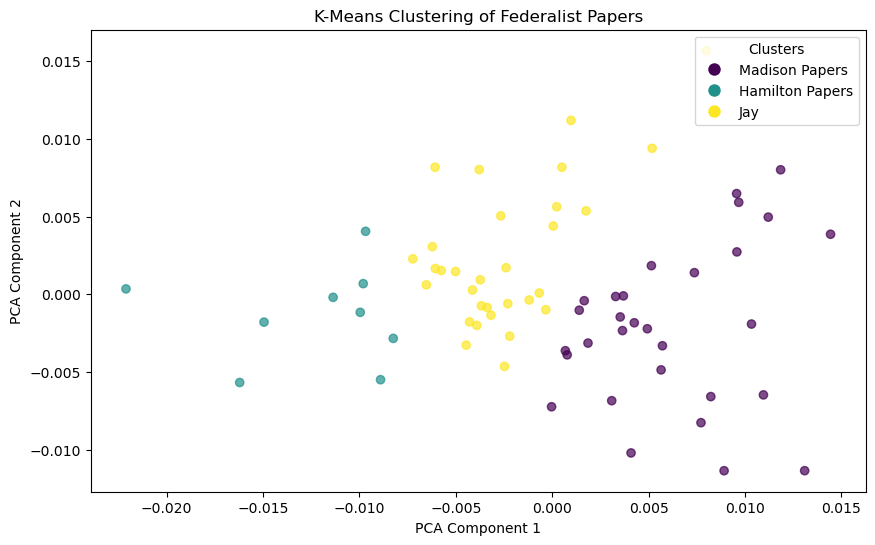

c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(




### Running for 2-gram dataset ###


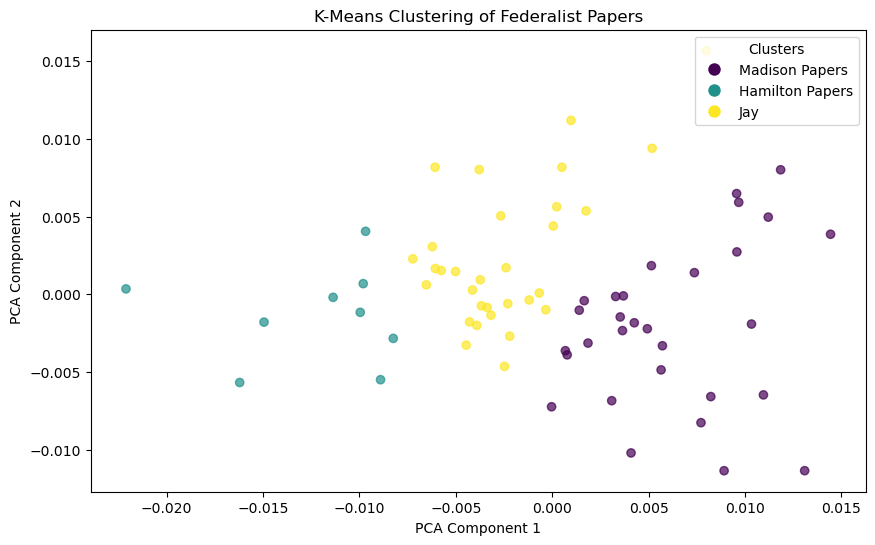

In [18]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters
    clusters = kmeans.fit_predict(X_pca)
    
    # Define cluster labels (update these based on your data)
    cluster_labels = {
        0: "Madison Papers",
        1: "Hamilton Papers",
        2: "Jay"
    }
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    
    # Add a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
               for i in range(len(cluster_labels))]
    plt.legend(handles, cluster_labels.values(), title="Clusters", loc="upper right")
    
    # Add titles and labels
    plt.title('K-Means Clustering of Federalist Papers')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

We can clearly the clusters well separated, indicating the stylistic differences of each author, demonstrating that our clustering is well aligined with the known authorship of the papers


## Clustering subsets of the data

### Making subsets of the data to cluster on

To avoid a messy dendogram with all 85 texts, we will make subsets from the Hamilton, Madison, and Jay papers, with only 5 papers each 
First, let's divide our dataframes into subsets for each category (H, M, J, Coauthored, and Disputed)

In [19]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Subset for papers by Madison
    madison_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'M']
    
    # Subset for papers by Hamilton
    hamilton_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'H']
    
    # Subset for papers by Jay
    jay_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'J']
    
    # Subset for disputed papers 
    disputed_papers = all_papers_unknown_authors[all_papers_unknown_authors['Author'] == 'D']
    
    # Subset for co-authored papers 
    coauthored_papers = all_papers_unknown_authors[all_papers_unknown_authors['Author'] == 'C']
    
    # Display the shapes of the subsets
    print(f"Madison Papers: {madison_papers.shape}")
    print(f"Hamilton Papers: {hamilton_papers.shape}")
    print(f"Jay Papers: {jay_papers.shape}")
    print(f"Disputed Papers: {disputed_papers.shape}")
    print(f"Co-authored Papers: {coauthored_papers.shape}")



### Running for 1-gram dataset ###
Madison Papers: (14, 70825)
Hamilton Papers: (51, 70825)
Jay Papers: (5, 70825)
Disputed Papers: (12, 70825)
Co-authored Papers: (3, 70825)


### Running for 2-gram dataset ###
Madison Papers: (14, 70825)
Hamilton Papers: (51, 70825)
Jay Papers: (5, 70825)
Disputed Papers: (12, 70825)
Co-authored Papers: (3, 70825)


Now lets make smaller subsets with only 5 papers from each author

In [20]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Create subsets with 5 papers from each author, excluding co-authored and disputed papers
    madison_subset = madison_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Madison
    hamilton_subset = hamilton_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Hamilton
    jay_subset = jay_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Jay
    
    # Combine the subsets into one DataFrame
    subset_combined = pd.concat([madison_subset, hamilton_subset, jay_subset])
    
    # Display the shapes of the subsets
    print(f"Madison Subset: {madison_subset.shape}")
    print(f"Hamilton Subset: {hamilton_subset.shape}")
    print(f"Jay Subset: {jay_subset.shape}")
    print(f"Combined Subset: {subset_combined.shape}")



### Running for 1-gram dataset ###
Madison Subset: (5, 70825)
Hamilton Subset: (5, 70825)
Jay Subset: (5, 70825)
Combined Subset: (15, 70825)


### Running for 2-gram dataset ###
Madison Subset: (5, 70825)
Hamilton Subset: (5, 70825)
Jay Subset: (5, 70825)
Combined Subset: (15, 70825)


In [21]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    subset_combined



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


### Performing hierachical clustering and displaying it as a dendogram

We need to decide on our linkage method and accompanying metric for the hierarchical clustering. Since we are working with continuous data, and to minimize our variance within clusters, we will use **Ward's Method** as our linkage method. Ward's Method is specifically designated to work with **Euclidean distance** as its distance metric, as it minimizes the variance within clusters, which is inherently tied ot the squared Euclidean distance. More on Ward's Method [here](https://en.wikipedia.org/wiki/Ward%27s_method)
(NOTE FOR SELF: TIME ALLOWING, TRY TO USE MORE LINKAGE METHODS AND METRICS)



### Running for 1-gram dataset ###


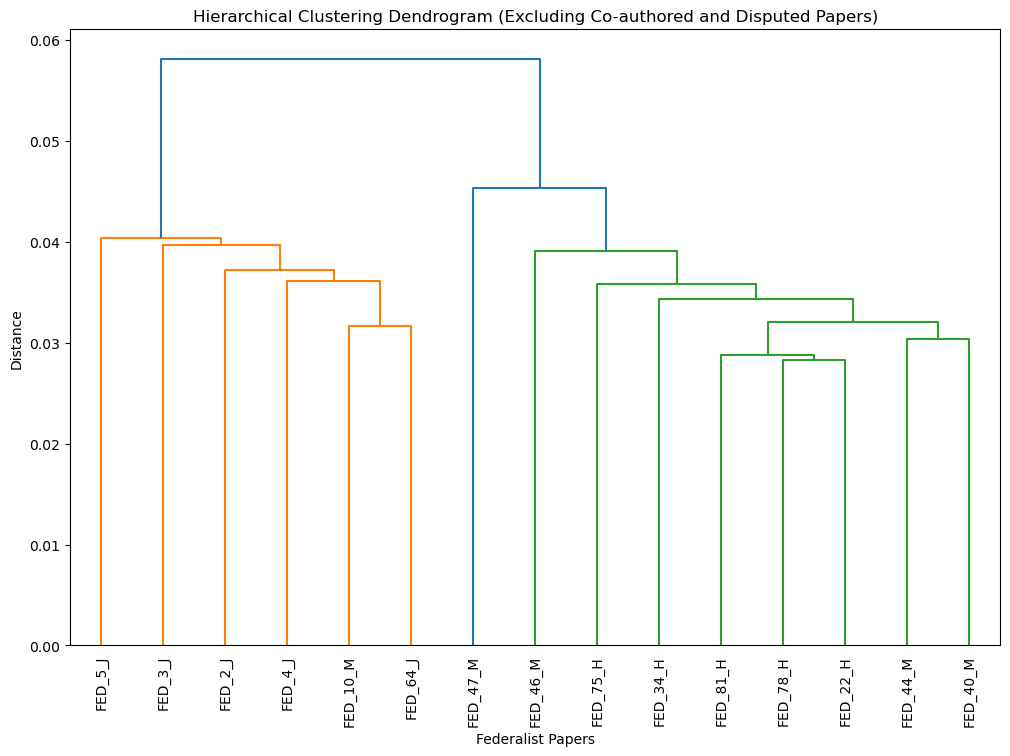



### Running for 2-gram dataset ###


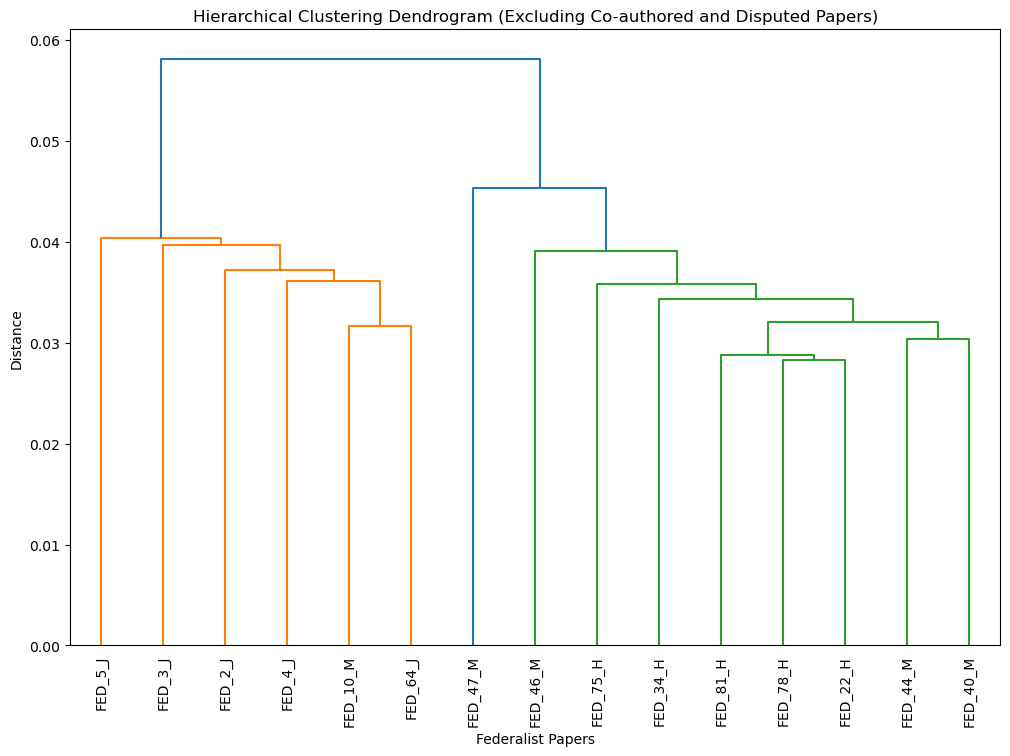

In [22]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Perform hierarchical clustering
    linkage_matrix = linkage(subset_combined.iloc[:, 2:], method='ward')  # Exclude 'Paper_ID' and 'Author' columns
    
    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=subset_combined['Paper_ID'].values, leaf_rotation=90, leaf_font_size=10)
    plt.title('Hierarchical Clustering Dendrogram (Excluding Co-authored and Disputed Papers)')
    plt.xlabel('Federalist Papers')
    plt.ylabel('Distance')
    plt.show()

At first glance, Madison's, Jay's, and Hamilton's papers are grouped together. Interestingly, we can see one of Madison's papers closest to Jay's cluster, a potential outlier to be investigated further

## **Classification algorithms**

Now let's apply some different classification algorithms and see if we can predict the authorship of the papers, and even try to find who most likely wrote the disputed papers

#### Splitting the data

We must first separate our data into the train and test data. We will only have papers with confirmed authorship for our train data, and include the disputed papers in our test data

In [23]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Define X (features) and y (target labels)
    X = df_1gram.drop(columns=['Paper_ID', 'Author'])  # Exclude 'Paper_ID' and 'Author' columns
    y = df_1gram['Author']  # Use the already extracted Author column
    
    # Verify the shapes of X and y
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")



### Running for 1-gram dataset ###
Shape of X: (85, 70823)
Shape of y: (85,)


### Running for 2-gram dataset ###
Shape of X: (85, 70823)
Shape of y: (85,)


We will split the dataset into training and testing subsets. The training data will consist of papers with known authorship (Hamilton, Madison, and Jay), while the testing data will include disputed and co-authored papers. This separation ensures that the model is trained only on confirmed data, allowing us to evaluate its ability to predict the authorship of unknown papers. The features (`X`) will exclude non-numeric columns like `Paper_ID` and `Author`, while the target labels (`y`) will be the `Author` column. The shapes of the resulting datasets will also be printed for verification.
```

In [24]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # split known-author and unknown-author data
    mask_known = y.isin(["H", "M", "J"])
    X_known = X[mask_known]
    y_known = y[mask_known]
    
    mask_unknown = y.isin(["D", "C"])
    X_unknown = X[mask_unknown]
    doc_ids_unknown = df_1gram[mask_unknown]["Paper_ID"]
    
    # define y_test for disputed or co-authored papers
    y_test = y[mask_unknown]



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


### Decision trees

Let's perform a Decision Tree, and train it with our know authroship data

In [25]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    tree_1grams = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
    tree_1grams.fit(X_known, y_known)



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Now let's used the trained Decision Tree Classifier to make predictions on the dataset `X_known`

In [26]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    predTree = tree_1grams.predict(X_known) #take the test data, and give the model's "guesses"



### Running for 1-gram dataset ###


### Running for 2-gram dataset ###


Let's find out how well we did and see our accuracy

In [27]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_known, predTree))



### Running for 1-gram dataset ###
DecisionTrees's Accuracy:  1.0


### Running for 2-gram dataset ###
DecisionTrees's Accuracy:  1.0


Let's see how our tree looks like



### Running for 1-gram dataset ###
|--- upon the <= 0.00
|   |--- the latter <= 0.00
|   |   |--- of which <= 0.00
|   |   |   |--- class: J
|   |   |--- of which >  0.00
|   |   |   |--- facility mask <= 0.00
|   |   |   |   |--- class: H
|   |   |   |--- facility mask >  0.00
|   |   |   |   |--- class: M
|   |--- the latter >  0.00
|   |   |--- have declared <= 0.00
|   |   |   |--- class: M
|   |   |--- have declared >  0.00
|   |   |   |--- class: H
|--- upon the >  0.00
|   |--- class: H



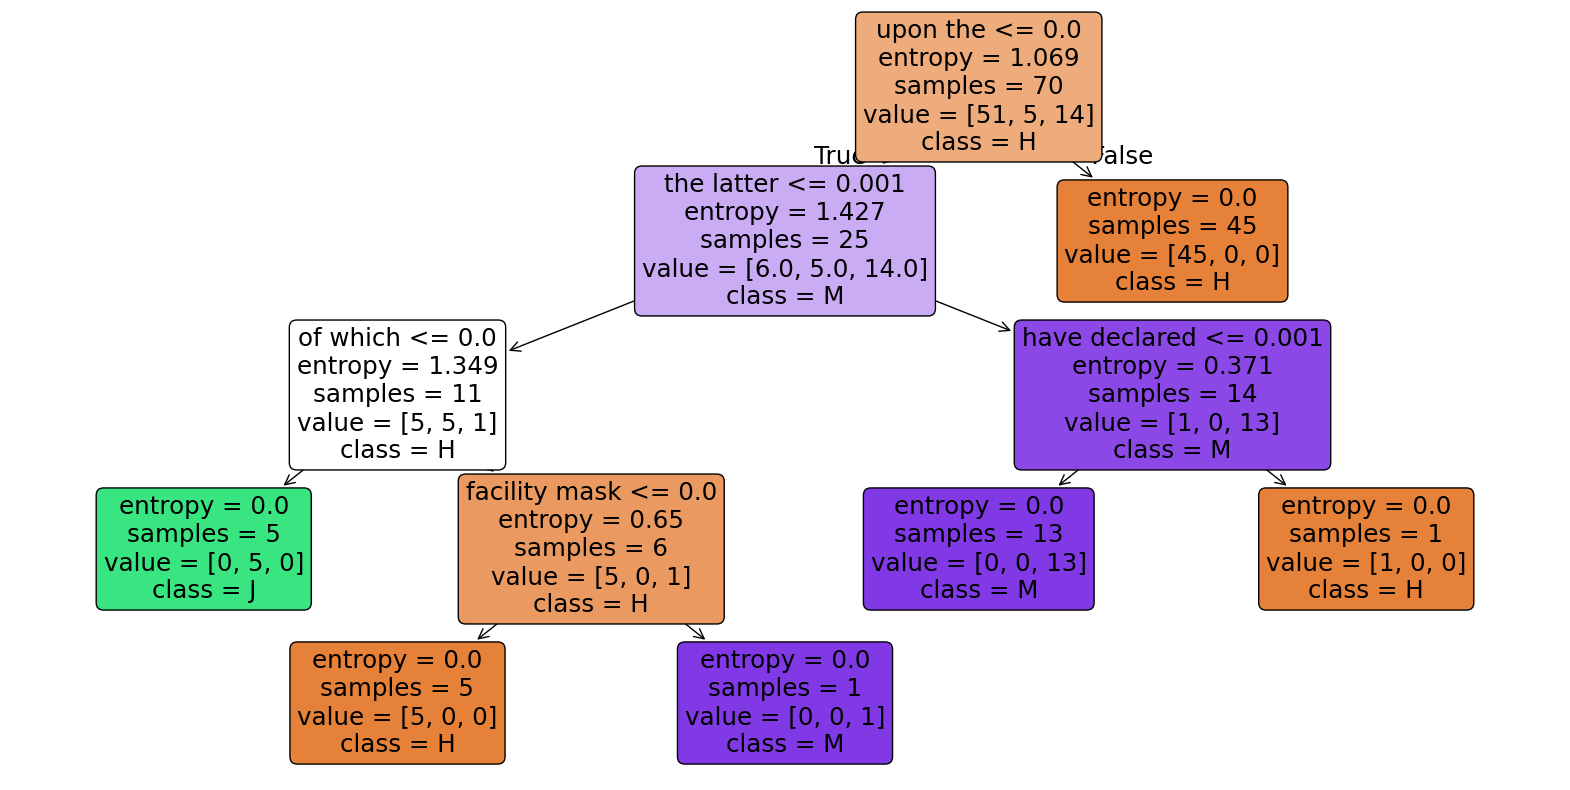



### Running for 2-gram dataset ###
|--- upon the <= 0.00
|   |--- the latter <= 0.00
|   |   |--- of which <= 0.00
|   |   |   |--- class: J
|   |   |--- of which >  0.00
|   |   |   |--- facility mask <= 0.00
|   |   |   |   |--- class: H
|   |   |   |--- facility mask >  0.00
|   |   |   |   |--- class: M
|   |--- the latter >  0.00
|   |   |--- have declared <= 0.00
|   |   |   |--- class: M
|   |   |--- have declared >  0.00
|   |   |   |--- class: H
|--- upon the >  0.00
|   |--- class: H



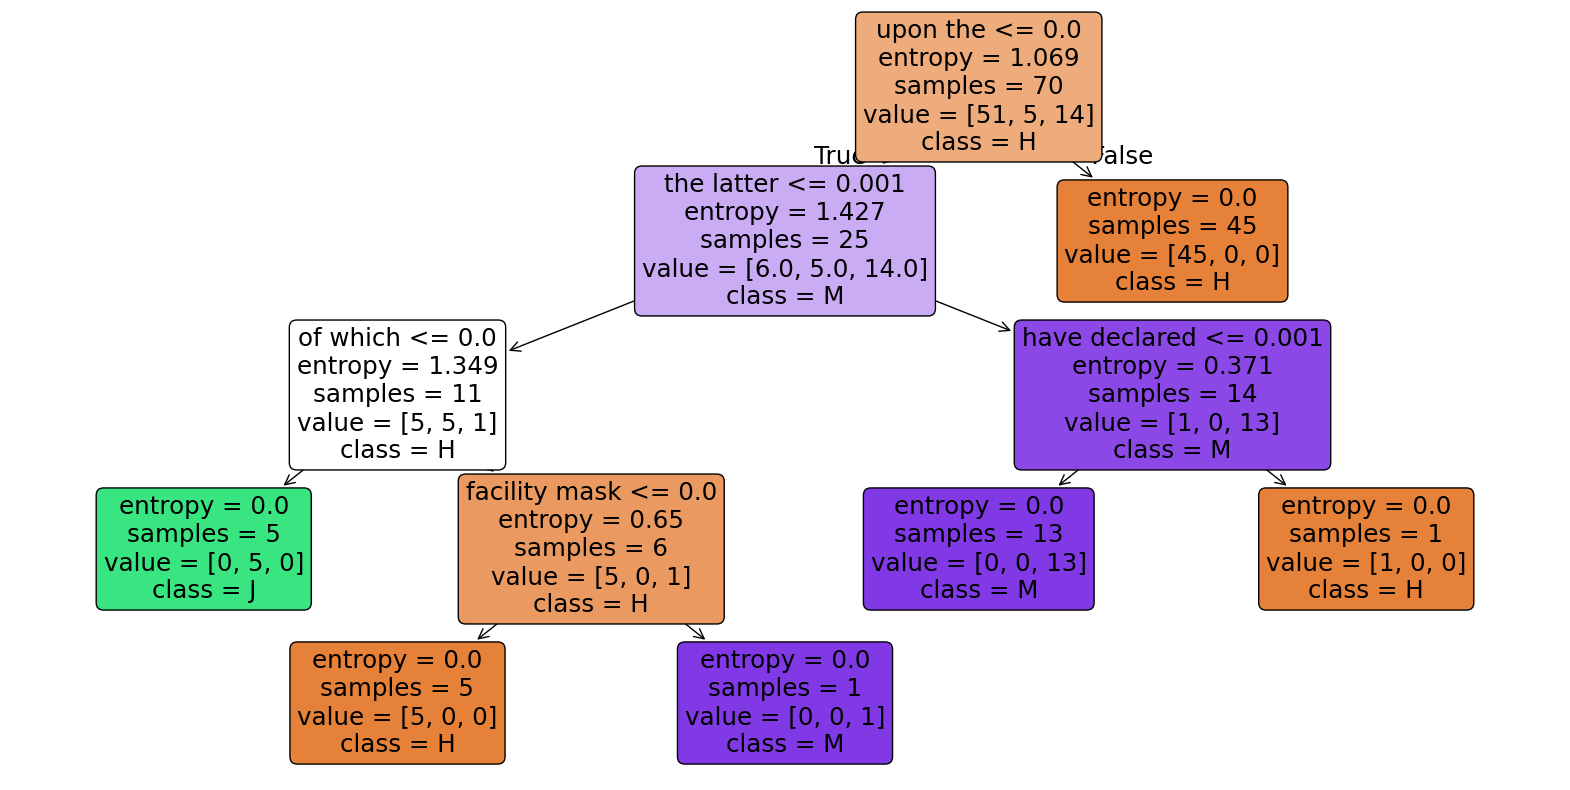

In [28]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Define class labels from y_known
    class_labels = y_known.unique()
    
    # Print the decision tree in text format
    tree_rules = export_text(tree_1grams, feature_names=X_known.columns.tolist())
    print(tree_rules)
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree_1grams, feature_names=X_known.columns, class_names=class_labels, filled=True, rounded=True)
    plt.show()

### Support Vector Machine (SVM)

Let's use a different classification algorithm and use SVM. We will begin by training our SVM with the `X_known` and `y_known` datasets

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    clf = svm.SVC(kernel='rbf') # making the object, kernel is the optimization technique
    clf.fit(X_known, y_known)



### Running for 1-gram dataset ###


In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Predict the authorship of the known authorship papers using the trained SVM model
    yhat_known = clf.predict(X_known)
    
    # Convert y_known to a list for comparison
    y_known_values = list(y_known)
    
    # Create a DataFrame to compare actual and predicted authors
    comparison_results = pd.DataFrame({
        'Paper_ID': df_1gram[mask_known]['Paper_ID'],  # Include Paper_ID for reference
        'Actual': y_known_values,
        'Predicted': yhat_known
    })
    
    # Print the comparison results
    print(comparison_results)

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    from sklearn.metrics import accuracy_score
    
    # Measure the accuracy of the SVM model
    svm_accuracy = accuracy_score(y_known, yhat_known)
    print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

Just as in statistics, yhat is a prediction of what the testset is going to be. Here it will show an array of all predictions from our test set.

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    yhat = clf.predict(X_unknown)
    yhat [0:5]

Let's see SVM prediction's for the coauthored and disputed papers

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Generate predictions for the test set (X_unknown)
    yhat = clf.predict(X_unknown)
    
    # Convert y_test to a list for comparison
    y_testValues = list(y_test)
    
    comparison_df = pd.DataFrame({
        'Paper_ID': doc_ids_unknown.values,  # Include Paper_ID for reference
        'Actual': y_testValues,
        'Predicted': yhat
    })
    
    # Print the comparison DataFrame
    print(comparison_df)
    

SVM tells us that all of the coauthored and dispute papers look the most similar to Hamilton's writing style; let's see what others have to say about that

### Naive Bayes

Let's now use a Naive Bayes model, train with our known authroship papers, to then try again to predict those disputed and coauthored papers' authorship

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Create and train the Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_known, y_known)

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Predict the authorship of the known authorship papers using the trained Naive Bayes model
    y_pred_nb_known = nb_model.predict(X_known)
    
    # Create a DataFrame to compare actual and predicted authors
    comparison_nb_known = pd.DataFrame({
        'Paper_ID': df_1gram[mask_known]['Paper_ID'],  # Include Paper_ID for reference
        'Actual': y_known.values,
        'Predicted': y_pred_nb_known
    })
    
    # Print the comparison results
    print(comparison_nb_known)
    
    # Calculate and print the accuracy of the Naive Bayes model
    nb_accuracy_known = accuracy_score(y_known, y_pred_nb_known)
    print(f"Naive Bayes Model Accuracy on Known Papers: {nb_accuracy_known:.2f}")

100% accuracy! Not bad at all

In [ ]:
for label, filename in datasets:
    print(f'\n\n### Running for {label} dataset ###')
    # Load and preprocess
    # Make predictions
    y_pred_nb = nb_model.predict(X_unknown)
    
    # Create a DataFrame to compare actual and predicted authors
    comparison_df = pd.DataFrame({
        'Paper_ID': doc_ids_unknown.values,
        'Actual': y_test.values,
        'Predicted': y_pred_nb
    })
    
    # Print the comparison DataFrame
    print(comparison_df)

Once again, our model shows that majority of these papers seem to have been written by Hamilton, besides #54

## **Bibliography**
- Jockers, M. L., & Witten, D. M. (2010). A comparative study of machine learning methods for authorship attribution.  
- Kleinman, S., et al. (2019). Lexos: A Text Analysis Tool.
- GitHub Copilot, powered by OpenAI's GPT-4 model.
